# Mexican Stocks Data Analysis

## Description

In this project I will analyse the stock value from two of the most important mexican food companies: Industrias [Bachoco, S.A.B. de C.V.](http://www.bachoco.com.mx/) (_BACHOCOB.MX_) and [Grupo Bimbo, S.A.B. de C.V](http://www.grupobimbo.com) (_BIMBOA.MX_). Both companies area headquarted in Mexico and play as ETF (_exchange-traded funds_) in the mexican stock market. Note that the prices are given in U.S. Dollars.

For this analysis I will use the following software: 

* __Python 2.7 (Anaconda version)__ as main programming language.
* __The Python's libraries Pandas and Numpy__ for data analysis
* __The Python's libraries Seabonrn and Matplotlib__ for data visualization.
* __Ubuntu 16.04__ as operating system.

In [1]:
# Last update
from datetime import datetime
print "Last Update: " + str(datetime.now())

Last Update: 2016-05-28 07:47:13.874264


In [2]:
# Initial imports
## For data analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# For showing plots inline
% matplotlib inline

# For reading stocks from Yahoo! Finance
from pandas.io.data import DataReader

# For division
from __future__ import division

/home/jarturomora/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


## Data Gathering and Analysis Set-Up

In the following section I will gather the stocks' data from Yahoo! Finance and I will set a frame of one year after today to conduct the analysis, therefore, the results would change in the future depending on which day the analysis code is executed.

In [3]:
# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of stock symbols to analyse
stock_sym = ['BACHOCOB.MX', 'BIMBOA.MX']

# Data gathering from Yahoo! Finance
symbols = {symbol:DataReader(symbol, 'yahoo', start, end) for symbol in stock_sym}

In [4]:
# Stocks sample data information
symbols['BACHOCOB.MX'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-28,71.90,72.20,71.36,71.58,207500,70.16777
2015-05-29,71.00,73.73,70.91,73.61,1287500,72.15772
2015-06-01,74.50,75.14,72.58,72.79,582700,71.35390
2015-06-02,73.66,73.66,72.39,72.50,288500,71.06962
2015-06-03,73.00,73.29,72.38,72.48,246800,71.05002


In [5]:
symbols["BIMBOA.MX"].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-28,41.00,41.34,40.80,40.98,772500,40.7857
2015-05-29,40.70,41.98,40.66,41.68,5688300,41.4824
2015-06-01,41.21,41.96,40.80,41.08,1306200,40.8852
2015-06-02,40.90,41.19,40.14,40.73,2314700,40.5369
2015-06-03,41.20,41.20,40.12,40.44,4030400,40.2483


## Basic Data Analysis

I will start the analysis by plotting some line charts that will display the _adjusted close value_ and the _volume_ of each stock symbol.

In [6]:
# Function to create the analysis line plot
def stock_line_plot(symbol, indicator, data, ylabel):
    """Creates a line plot for basic stock symbol's indicator"""
    data[indicator].plot(legend = True, figsize = (12, 6))
    plt.title("%s Value for %s Along the Last Year" % (indicator, symbol), weight = 'bold')
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    ## Ploting the Max, Min, and Average value
    symbol_max_adj = data[indicator].max()
    symbol_min_adj = data[indicator].min()
    symbol_avg_adj = data[indicator].mean()
    plt.figtext(0.13, 0.85, "Max %0.2f" % symbol_max_adj)
    plt.axhline(y = symbol_max_adj, linewidth = 2, color = 'green')
    plt.figtext(0.13, 0.20, "Min %0.2f" % symbol_min_adj)
    plt.axhline(y = symbol_min_adj, linewidth = 2, color = 'red')
    plt.figtext(0.13, 0.50, "Avg %0.2f" % symbol_avg_adj)
    plt.axhline(y = symbol_avg_adj, linewidth = 2, color = 'orange')

### Data Analysis for _BACHOCOB.MX_

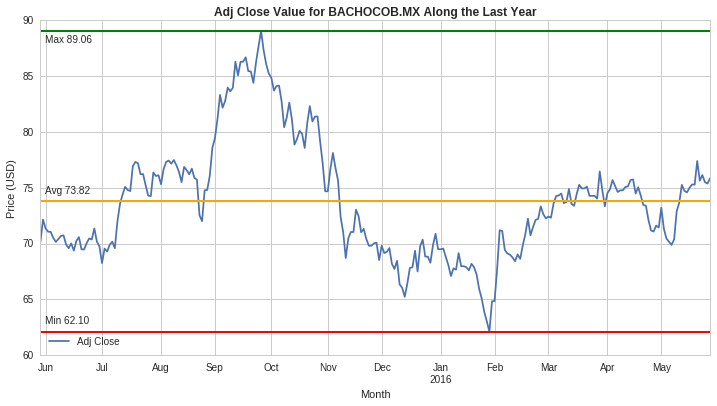

In [7]:
# Adjusted close value analysis
stock_line_plot('BACHOCOB.MX', 'Adj Close', symbols['BACHOCOB.MX'], 'Price (USD)')

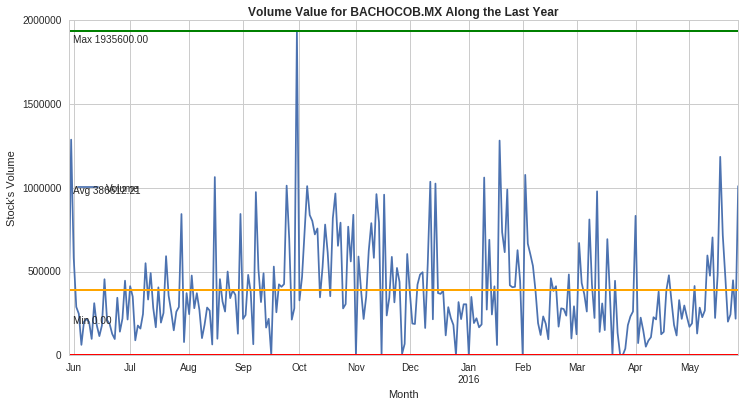

In [8]:
# Volume analysis
stock_line_plot('BACHOCOB.MX', 'Volume', symbols['BACHOCOB.MX'], "Stock's Volume")

### Data Analysis for _BIMBOA.MX_

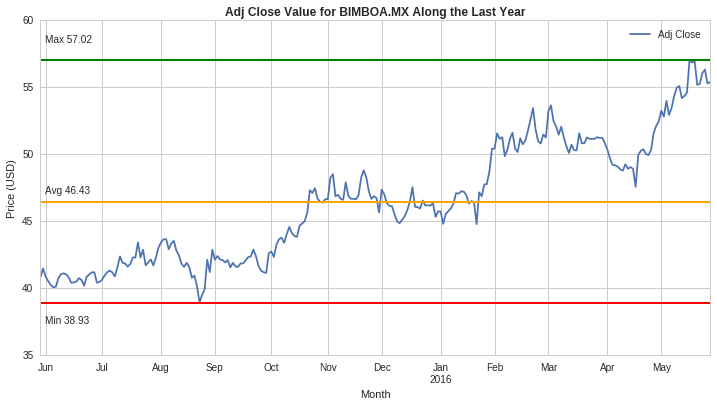

In [9]:
# Adjusted close value analysis
stock_line_plot('BIMBOA.MX', 'Adj Close', symbols['BIMBOA.MX'], 'Price (USD)')

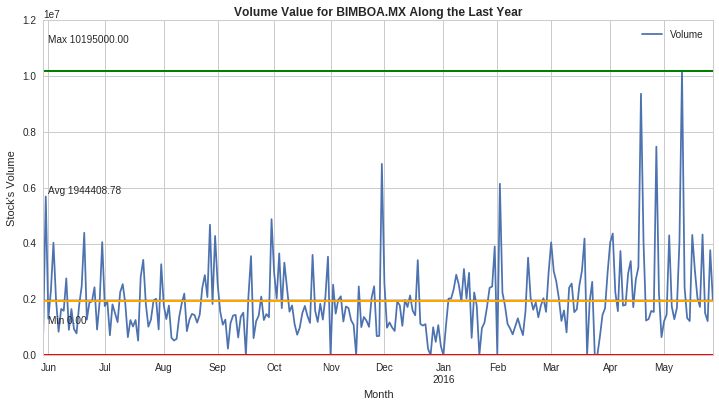

In [10]:
# Volume analysis
stock_line_plot('BIMBOA.MX', 'Volume', symbols['BIMBOA.MX'], "Stock's Volume")

### Comparing the Two Companies Adj Close

In [11]:
# Create a new data frame for closing stocks values only
closing_df = DataReader(stock_sym, 'yahoo', start, end)['Adj Close']

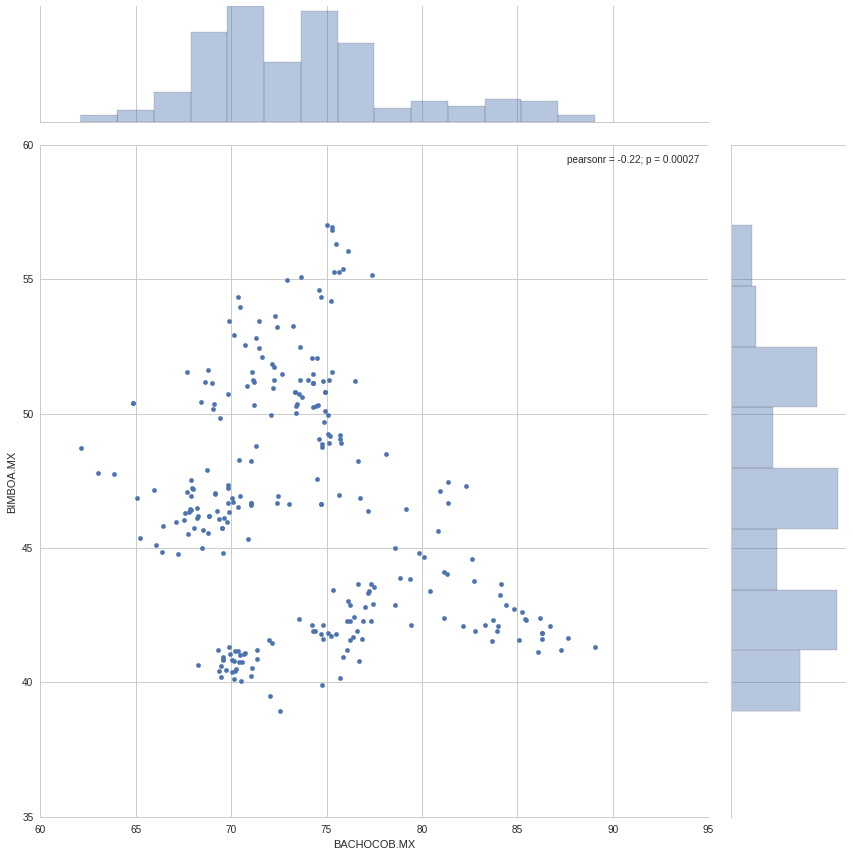

In [12]:
sns.jointplot(x = 'BACHOCOB.MX', y = 'BIMBOA.MX', data = closing_df, size = 12)

## Analysing Moving Averages (MA)



Now I wil caculate the moving average for the stock. For more info on the _moving average_ check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp
2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


In [13]:
# Function to calculate moving averages
def moving_averages(data, indicator, ma_days):
    for ma in ma_days:
        column_name = "MA for %s days" % (str(ma))
        # We calculate the "rolling mean" for the series of each MA
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
        # http://pandas.pydata.org/pandas-docs/stable/computation.html#rolling-windows
        data[column_name] = data[indicator].rolling(window = ma, center = False).mean()

In [14]:
# Define the moving averages to work with
ma_day = [10, 20, 50]

# Now we will add a new column to each dataframe with the MA information
## Moving averages for BACHOCOB.MX
moving_averages(symbols['BACHOCOB.MX'], 'Adj Close', ma_day)
## ## Moving averages for BIMBOA.MX
moving_averages(symbols['BIMBOA.MX'], 'Adj Close', ma_day)

In [15]:
# Function to plot Moving Averages
def plot_averages(data, ma_days, indicator, stock):
    # Define a list for the MA windows
    ma_windows = ['MA for %s days' % str(ma) for ma in ma_days]
    ma_windows.append(indicator)
    data[ma_windows[0:len(ma_windows)]].plot(figsize = (10, 4), subplots = False)
    plt.title("Moving Averages for %s" % stock)
    plt.ylabel("Price (USD)")

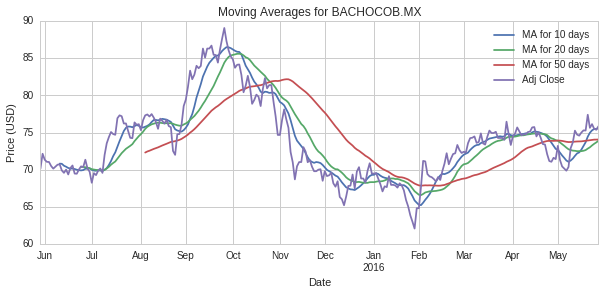

In [16]:
# Plot of moving averages for BACHOCOB.MX
plot_averages(symbols['BACHOCOB.MX'], ma_day, 'Adj Close', 'BACHOCOB.MX')

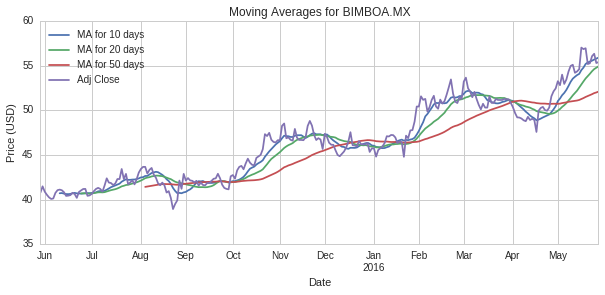

In [17]:
# Plot of moving averages for BIMBOA.MX
plot_averages(symbols['BIMBOA.MX'], ma_day, 'Adj Close', 'BIMBOA.MX')

## Analysis of Daily Return

Return on investment is a measure of investment performance used by both professional and novice investors alike. By dividing the loss or gain on the investment from one day by the original cost of the investment (day 1 market value), potential investors can compare investment opportunities by looking at the daily return percentage rate.

_Source:_ http://www.ehow.com/how_6453081_calculate-daily-return.html

In [18]:
# Function to calculate the daily return
def daily_retun(data, indicator):
    # I calculate the daily return using the pct_change method from Pandas' Series
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html
    data['Daily Return'] = data[indicator].pct_change()

In [19]:
# Calculate daily return for BACHOCOB.MX
daily_retun(symbols['BACHOCOB.MX'], 'Adj Close')

# Calculate daily return for BIMBOA.MX
daily_retun(symbols['BIMBOA.MX'], 'Adj Close')

In [26]:
# Function to ploy daily return
def plot_daily_return(data, indicator, stock):
    data[indicator].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')
    plt.title("Daily Return for %s" % stock)
    plt.ylabel("Daily Return (%)")

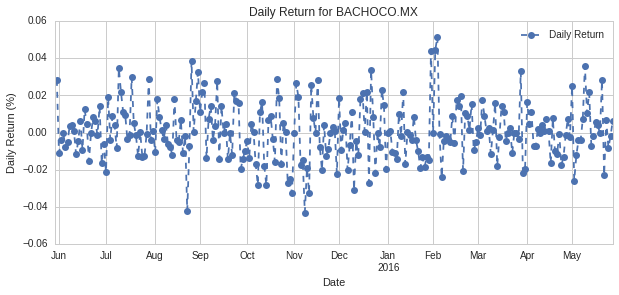

In [27]:
# Plot daily return for BACHOCOB.MX
plot_daily_return(symbols['BACHOCOB.MX'], 'Daily Return', 'BACHOCO.MX')

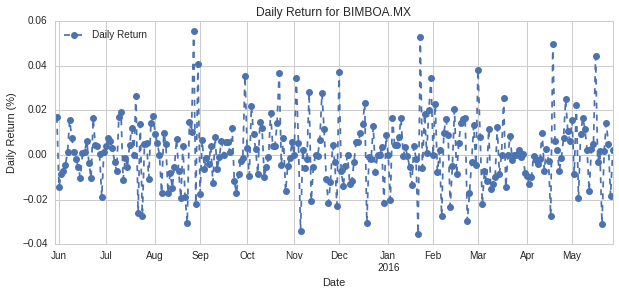

In [28]:
# Plot daily return for BIMBOA.MX
plot_daily_return(symbols['BIMBOA.MX'], 'Daily Return', 'BIMBOA.MX')

Following two histograms showing an overal look at the average daily return are presented. I used seaborn to create both a histogram and kde plot on the same figure.

In [35]:
# Function to create the histogram
def daily_return_histogram(data, indicator, stock):
    sns.distplot(data[indicator].dropna(), bins = 100, color = 'blue')
    plt.title("Histogram of %s Daily Return" % stock)
    plt.ylabel("Counts")

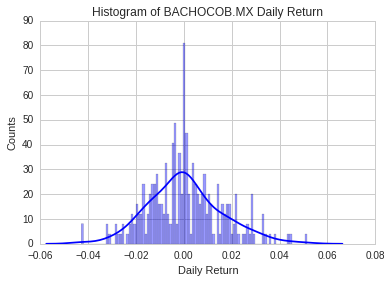

In [36]:
# Histogram for BACHOCOB.MX
daily_return_histogram(symbols['BACHOCOB.MX'], 'Daily Return', 'BACHOCOB.MX')

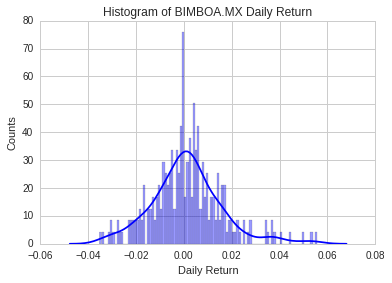

In [37]:
# Histogram for BIMBOA.MX
daily_return_histogram(symbols['BIMBOA.MX'], 'Daily Return', 'BIMBOA.MX')